Here are the key features we'll keep and their explanations:

age: The age of the patient (numeric).
sex: The gender of the patient ('M' for Male, 'F' for Female).
on thyroxine: Whether the patient is on thyroxine treatment ('t' for true, 'f' for false).
query on thyroxine: Whether there is a query if the patient is on thyroxine treatment ('t' for true, 'f' for false).
on antithyroid medication: Whether the patient is on antithyroid medication ('t' for true, 'f' for false).
sick: Whether the patient is sick ('t' for true, 'f' for false).
pregnant: Whether the patient is pregnant ('t' for true, 'f' for false).
thyroid surgery: Whether the patient has had thyroid surgery ('t' for true, 'f' for false).
I131 treatment: Whether the patient has had I131 treatment ('t' for true, 'f' for false).
query hypothyroid: Whether there is a query if the patient is hypothyroid ('t' for true, 'f' for false).
query hyperthyroid: Whether there is a query if the patient is hyperthyroid ('t' for true, 'f' for false).
TSH measured: Whether TSH (Thyroid Stimulating Hormone) was measured ('t' for true, 'f' for false).
TSH: TSH value (numeric).
T3 measured: Whether T3 (Triiodothyronine) was measured ('t' for true, 'f' for false).
T3: T3 value (numeric).
TT4 measured: Whether TT4 (Total Thyroxine) was measured ('t' for true, 'f' for false).
TT4: TT4 value (numeric).
T4U measured: Whether T4U (Thyroxine Uptake) was measured ('t' for true, 'f' for false).
T4U: T4U value (numeric).
FTI measured: Whether FTI (Free Thyroxine Index) was measured ('t' for true, 'f' for false).
FTI: FTI value (numeric).

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_classif
import pickle

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [6]:
df = pd.read_csv('hypothyroid.csv')

In [7]:
df.columns = df.columns.str.replace(' ', '_')

In [8]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [77]:
df["binaryClass"].value_counts()

binaryClass
1    3481
0     291
Name: count, dtype: int64

In [9]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'binaryClass'],
      dtype='object')

In [10]:
df = df.drop(['referral_source','TBG_measured', 'TBG'], axis=1)

In [11]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,1.3,t,2.5,t,125,t,1.14,t,109,P
1,23,F,f,f,f,f,f,f,f,f,...,4.1,t,2,t,102,f,?,f,?,P
2,46,M,f,f,f,f,f,f,f,f,...,0.98,f,?,t,109,t,0.91,t,120,P
3,70,F,t,f,f,f,f,f,f,f,...,0.16,t,1.9,t,175,f,?,f,?,P
4,70,F,f,f,f,f,f,f,f,f,...,0.72,t,1.2,t,61,t,0.87,t,70,P


In [12]:
df.replace('?', np.nan, inplace=True)



In [13]:
df.isnull().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                          369
T3_measured                    0
T3                           769
TT4_measured                   0
TT4                          231
T4U_measured                   0
T4U                          387
FTI_measured                   0
FTI                          385
binaryClass                    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3771 non-null   object
 1   sex                        3622 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [15]:
# Convert appropriate columns to numeric
numeric_columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3622 non-null   object 
 2   on_thyroxine               3772 non-null   object 
 3   query_on_thyroxine         3772 non-null   object 
 4   on_antithyroid_medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid_surgery            3772 non-null   object 
 8   I131_treatment             3772 non-null   object 
 9   query_hypothyroid          3772 non-null   object 
 10  query_hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

In [18]:
df["binaryClass"].value_counts()

binaryClass
P    3481
N     291
Name: count, dtype: int64

In [19]:
df["binaryClass"]=df["binaryClass"].map({"P":1,"N":0})

In [20]:
df=df.replace({"t":1,"f":0})

C:\Users\thani\AppData\Local\Temp\ipykernel_32724\2701917258.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace({"t":1,"f":0})


In [21]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,binaryClass
0,41.0,F,0,0,0,0,0,0,0,0,...,1.30,1,2.5,1,125.0,1,1.14,1,109.0,1
1,23.0,F,0,0,0,0,0,0,0,0,...,4.10,1,2.0,1,102.0,0,NaN,0,NaN,1
2,46.0,M,0,0,0,0,0,0,0,0,...,0.98,0,NaN,1,109.0,1,0.91,1,120.0,1
3,70.0,F,1,0,0,0,0,0,0,0,...,0.16,1,1.9,1,175.0,0,NaN,0,NaN,1
4,70.0,F,0,0,0,0,0,0,0,0,...,0.72,1,1.2,1,61.0,1,0.87,1,70.0,1


In [22]:
df["sex"].value_counts()

sex
F    2480
M    1142
Name: count, dtype: int64

In [23]:
df=df.replace({"F":1,"M":0})

C:\Users\thani\AppData\Local\Temp\ipykernel_32724\2226186041.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace({"F":1,"M":0})


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3622 non-null   float64
 2   on_thyroxine               3772 non-null   int64  
 3   query_on_thyroxine         3772 non-null   int64  
 4   on_antithyroid_medication  3772 non-null   int64  
 5   sick                       3772 non-null   int64  
 6   pregnant                   3772 non-null   int64  
 7   thyroid_surgery            3772 non-null   int64  
 8   I131_treatment             3772 non-null   int64  
 9   query_hypothyroid          3772 non-null   int64  
 10  query_hyperthyroid         3772 non-null   int64  
 11  lithium                    3772 non-null   int64  
 12  goitre                     3772 non-null   int64  
 13  tumor                      3772 non-null   int64

In [25]:
df['T4U_measured'].mean()

np.float64(0.8974019088016967)

In [26]:
df['T4U_measured'].fillna(df['T4U_measured'].mean(), inplace=True)

C:\Users\thani\AppData\Local\Temp\ipykernel_32724\708923042.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['T4U_measured'].fillna(df['T4U_measured'].mean(), inplace=True)


In [27]:
df['sex'].fillna(df['sex'].mean(), inplace=True)

C:\Users\thani\AppData\Local\Temp\ipykernel_32724\2421622677.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].fillna(df['sex'].mean(), inplace=True)


In [28]:
df['age'].fillna(df['age'].mean(), inplace=True)

C:\Users\thani\AppData\Local\Temp\ipykernel_32724\1503503937.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


In [29]:
imputer = SimpleImputer(strategy='mean')

In [30]:
df['TSH'] = imputer.fit_transform(df[['TSH']])
df['T3'] = imputer.fit_transform(df[['T3']])
df['TT4'] = imputer.fit_transform(df[['TT4']])
df['T4U'] = imputer.fit_transform(df[['T4U']])
df['FTI'] = imputer.fit_transform(df[['FTI']])

In [31]:
df.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
binaryClass                  0
dtype: int64

In [32]:
def removal_box_plot(df, column, threshold):
	sns.boxplot(df[column])
	plt.title(f'Original Box Plot of {column}')
	plt.show()

	removed_outliers = df[df[column] <= threshold]

	sns.boxplot(removed_outliers[column])
	plt.title(f'Box Plot without Outliers of {column}')
	plt.show()
	return removed_outliers


In [33]:
df['TSH_measured'].value_counts()

TSH_measured
1    3403
0     369
Name: count, dtype: int64

In [34]:
df["TSH"].max()

np.float64(530.0)

Core Features
These features are directly related to thyroid function and are likely to be highly predictive:

TSH: Thyroid-stimulating hormone, a crucial indicator of thyroid function.
T3: Triiodothyronine, a thyroid hormone.
TT4: Total thyroxine, another thyroid hormone.
T4U: Free thyroxine index, a measure of free thyroxine in the blood.
FTI: Free thyroxine index, another measure of free thyroxine.
Supporting Features
These features provide additional context and can contribute to the predictive power of the model:

age: Age can influence thyroid function.
sex: Gender differences in thyroid function exist.
on thyroxine,query on thyroxine,on antithyroid medication,thyroid surgery,I131 treatment`: These indicate thyroid-related treatments and interventions.
sick,pregnant`: These factors can affect thyroid function.
query hypothyroid,query hyperthyroid`: These indicate patient concerns or suspicions about thyroid conditions.
Potentially Less Important Features
While these features might have some relevance, their impact on the model's performance might be limited:

lithium,goitre,tumor,hypopituitary,psych`: These features might be correlated with thyroid disorders but could also introduce noise into the data.
Target Feature
binaryClass: This is likely the target variable indicating the presence or absence of a thyroid condition.

<Axes: xlabel='TSH', ylabel='age'>

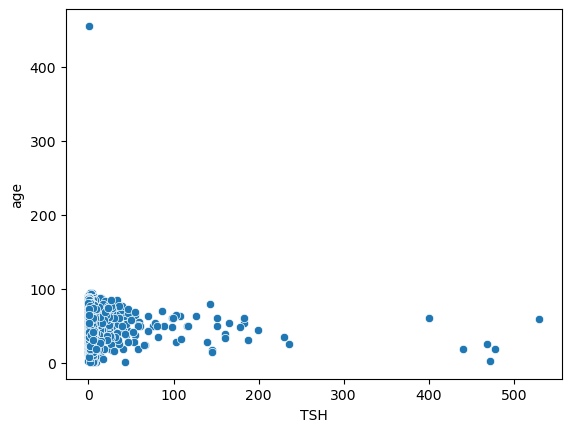

In [145]:
sns.scatterplot(x='TSH',y='age', data=df)

<Axes: ylabel='T3'>

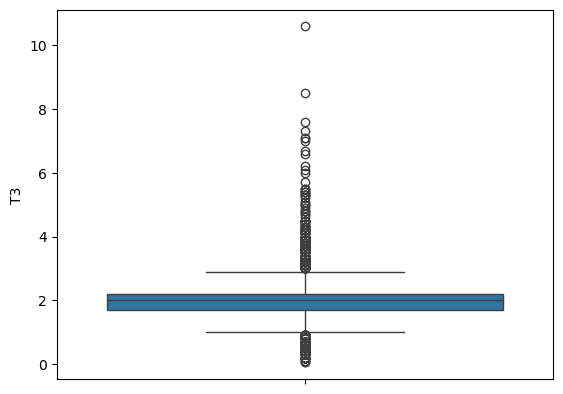

In [146]:
sns.boxplot(df['T3'])

In [35]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'binaryClass'],
      dtype='object')

In [36]:
def cap_outliers(df, column, factor=1.5):
  """
  Caps outliers in a specified column of a DataFrame using the IQR method.

  Args:
    df: The pandas DataFrame containing the data.
    column: The name of the column to check for outliers.
    factor: The multiplier for IQR to define outlier boundaries (default is 1.5).

  Returns:
    A new DataFrame with outliers capped.
  """

  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - (factor * IQR)
  upper_bound = Q3 + (factor * IQR)

  df_copy = df.copy()
  df_copy[column] = np.clip(df_copy[column], lower_bound, upper_bound)
  return df_copy

In [37]:
df = cap_outliers(df, 'TSH')

In [38]:
df = cap_outliers(df, 'T4U')

In [39]:
df = cap_outliers(df, 'FTI')

In [40]:
df = cap_outliers(df, 'T3')

In [41]:
df = cap_outliers(df, 'TT4')

In [42]:
df['TSH'].max()

np.float64(8.6)

In [43]:
df.shape

(3772, 27)

<Axes: ylabel='T3'>

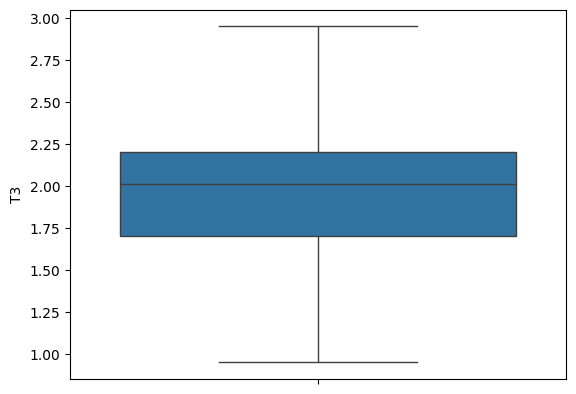

In [44]:
sns.boxplot(df['T3'])

In [78]:
df["binaryClass"].value_counts()

binaryClass
1    3481
0     291
Name: count, dtype: int64

In [45]:
X = df.drop(columns=['binaryClass'])  
y = df['binaryClass']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [74]:
y_train.value_counts()

binaryClass
0    2784
1    2784
Name: count, dtype: int64

In [50]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# Define the resampling strategy
oversample = SMOTE()
undersample = RandomUnderSampler()

# Create the pipeline for resampling
resampling_pipeline = ImbPipeline(steps=[
    ('o', oversample),
    ('u', undersample)
])

# Apply resampling
X_train, y_train = resampling_pipeline.fit_resample(X_train, y_train)


In [73]:
y_train.value_counts()


binaryClass
0    2784
1    2784
Name: count, dtype: int64

In [51]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def select_best_model(models, X, y, scoring='accuracy'):
  """
  Selects the best model based on the specified scoring metric.

  Args:
    models: A dictionary of model names and their corresponding estimators.
    X: Feature matrix.
    y: Target variable.
    scoring: Scoring metric to use (default: 'accuracy').

  Returns:
    The best model based on the specified scoring metric.
  """

  best_score = 0
  best_model = None

  for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring=scoring)
    mean_score = scores.mean()
    print(f"{model_name}: Mean {scoring} score: {mean_score:.3f}")

    if mean_score > best_score:
      best_score = mean_score
      best_model = model

  return best_model




In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score


In [54]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier()
}

# Assuming X and y are your feature matrix and target variable

best_model = select_best_model(models, X, y, scoring='f1')
print("Best model:", best_model)

d:\Data_science\Healthcare_project\Thyroid_diseases_prediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Data_science\Healthcare_project\Thyroid_diseases_prediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    h

Logistic Regression: Mean f1 score: 0.992
Random Forest: Mean f1 score: 0.998
Support Vector Machine: Mean f1 score: 0.968
KNeighborsClassifier: Mean f1 score: 0.970
GradientBoostingClassifier: Mean f1 score: 0.999
DecisionTreeClassifier: Mean f1 score: 0.998
Best model: GradientBoostingClassifier()


In [57]:

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9973509933774835
Precision: 0.9985652797704447
Recall: 0.9985652797704447
F1-score: 0.9985652797704447
ROC AUC: 0.99066195023005
Confusion Matrix:
 [[ 57   1]
 [  1 696]]


In [58]:

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)


                      Feature    Importance
17                        TSH  9.430728e-01
2                on_thyroxine  2.088382e-02
21                        TT4  1.652795e-02
25                        FTI  1.179327e-02
7             thyroid_surgery  5.904754e-03
0                         age  7.149261e-04
23                        T4U  4.887683e-04
19                         T3  3.981441e-04
18                T3_measured  9.121012e-05
9           query_hypothyroid  5.688824e-05
15                      psych  3.646701e-05
24               FTI_measured  3.086821e-05
22               T4U_measured  1.596930e-07
6                    pregnant  0.000000e+00
3          query_on_thyroxine  0.000000e+00
1                         sex  0.000000e+00
4   on_antithyroid_medication  0.000000e+00
5                        sick  0.000000e+00
8              I131_treatment  0.000000e+00
14              hypopituitary  0.000000e+00
16               TSH_measured  0.000000e+00
13                      tumor  0

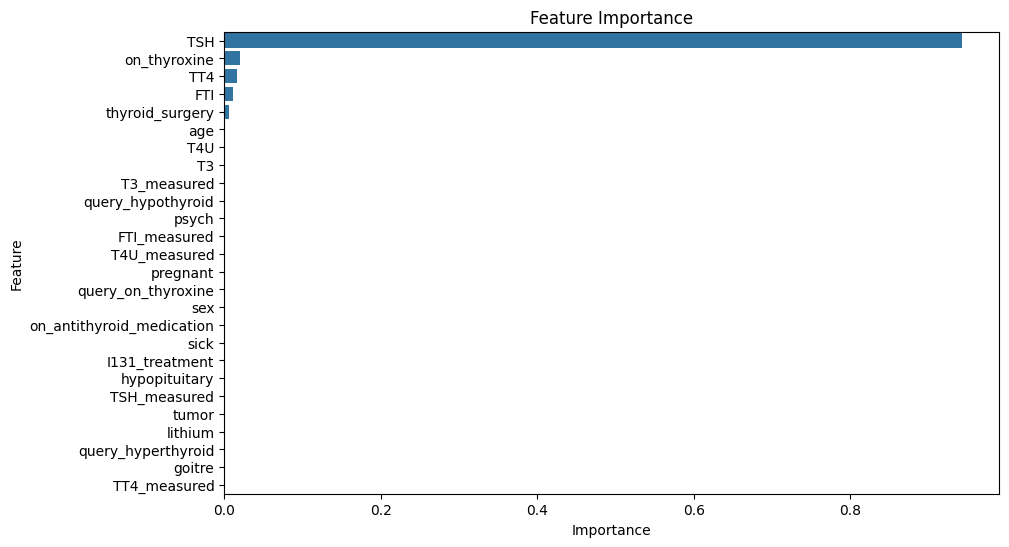

In [59]:
importances = best_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(importance_df)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


In [60]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='f1')
print(f'Cross-Validation F1 Scores: {cv_scores}')
print(f'Mean F1 Score: {cv_scores.mean()}')


Cross-Validation F1 Scores: [0.99463327 0.99820144 0.99820144 0.99730458 0.99729973]
Mean F1 Score: 0.9971280927168247


In [62]:
pip install shap

     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     --------------------- ------------------ 30.7/57.6 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 763.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/456.2 kB ? eta -:--:--
   --------- ------------------------------ 112.6/456.2 kB 2.2 MB/s eta 0:00:01
   ------------------------ --------------- 276.5/456.2 kB 2.8 MB/s eta 0:00:01
   ----------------------------- ---------- 337.9/456.2 kB 2.3 MB/s eta 0:00:01
   ----------------------------- ---------- 337.9/456.2 kB 2.3 MB/s eta 0:00:01
   ----------------------------- ---------- 337.9/456.2 kB 2.3 MB/s eta 0:00:01
   ----------------------------- ---------- 337.9/456.2 kB 2.3 MB/s eta 0:00:01
   ----------------------------- ---------- 337.9/456.2 kB 2.3 MB/s eta 0:00:01
   ----------------------------- ---------- 337.9/456.2 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 456.2/456.2 k

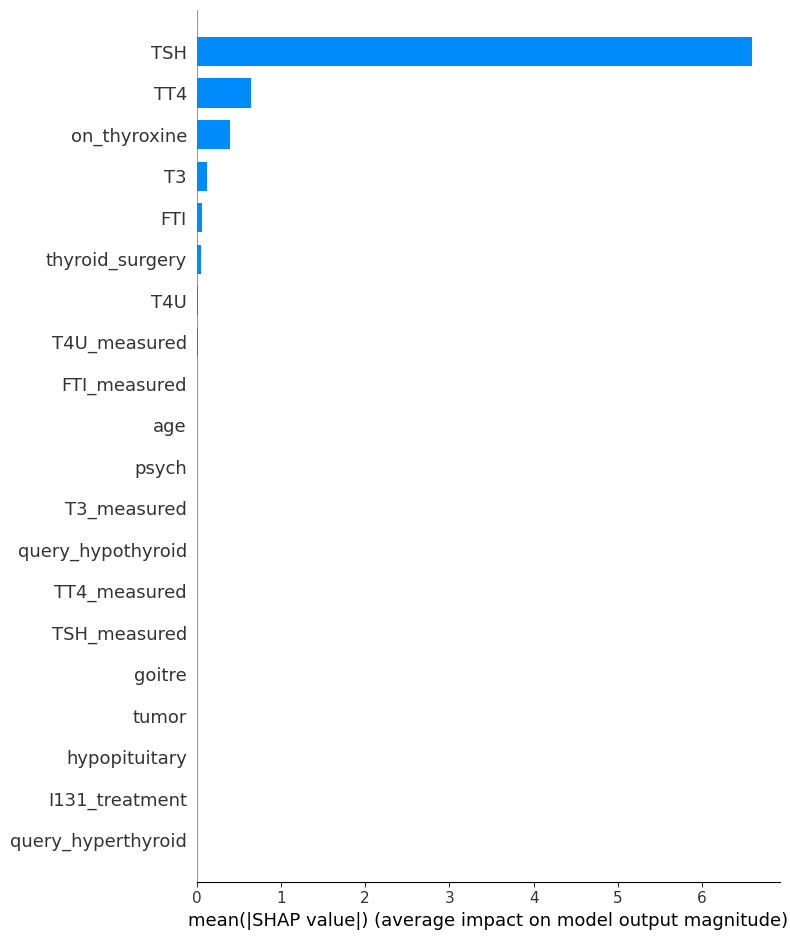

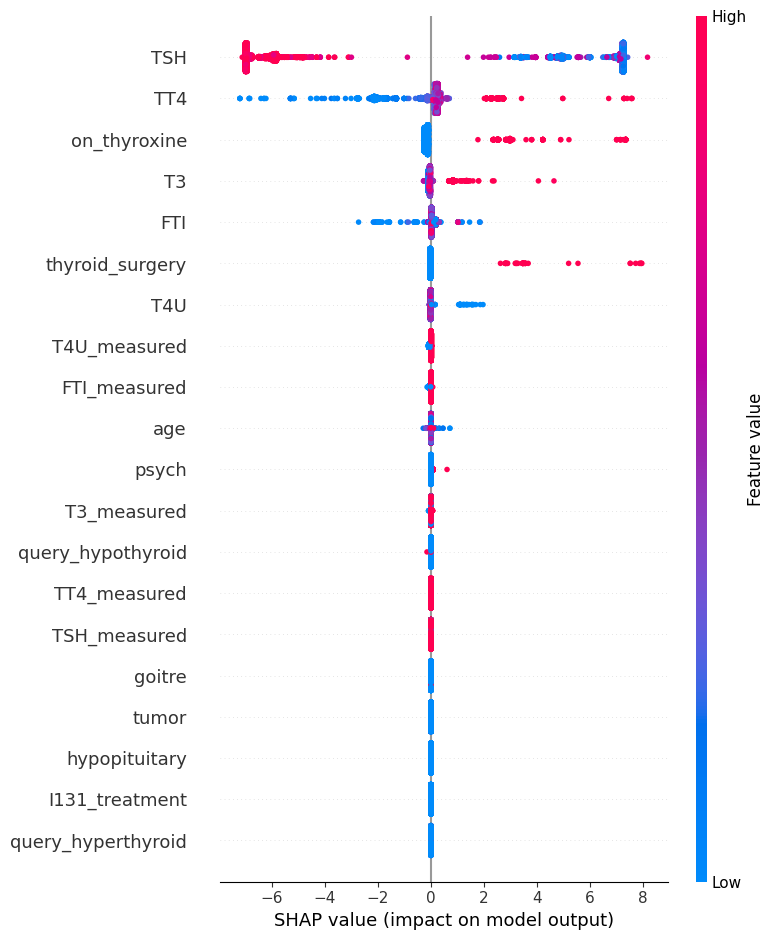

In [64]:
import shap

# Create a SHAP explainer
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_train)

# Plot the SHAP summary
shap.summary_plot(shap_values, X_train, plot_type="bar")
shap.summary_plot(shap_values, X_train)


In [65]:
# Selecting important features
selected_features = ['TSH', 'on_thyroxine', 'TT4', 'FTI', 'thyroid_surgery', 'age', 'T4U', 'T3']
X_selected = X_train[selected_features]

# Re-train the model with selected features
best_model.fit(X_selected, y_train)


GradientBoostingClassifier()

In [71]:
print(df.iloc[15])

age                          65.0000
sex                           1.0000
on_thyroxine                  0.0000
query_on_thyroxine            0.0000
on_antithyroid_medication     0.0000
sick                          0.0000
pregnant                      0.0000
thyroid_surgery               0.0000
I131_treatment                0.0000
query_hypothyroid             1.0000
query_hyperthyroid            0.0000
lithium                       0.0000
goitre                        0.0000
tumor                         0.0000
hypopituitary                 0.0000
psych                         0.0000
TSH_measured                  1.0000
TSH                           8.6000
T3_measured                   0.0000
T3                            2.0135
TT4_measured                  1.0000
TT4                          99.0000
T4U_measured                  1.0000
T4U                           1.1400
FTI_measured                  1.0000
FTI                          87.0000
binaryClass                   0.0000
N

In [258]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'binaryClass'],
      dtype='object')

In [261]:

# Function to get user input and convert to the appropriate format
def get_user_data():
    print("Enter the following details:")
    
    age = int(input("Age: "))
    sex = bool(input("Sex (Male=1, Female=0): "))
    on_thyroxine = bool(input("You is on thyroxine treatment ('1' for true, '0' for false): "))
    query_on_thyroxine = bool(input("Whether there is a query if the patient is on thyroxine treatment ('1' for true, '0' for false): "))
    on_antithyroid_medication = bool(input("Whether the patient is on antithyroid medication ('1' for true, '0' for false): "))
    sick = bool(input("Whether the patient is sick ('1' for true, '0' for false): "))
    pregnant = bool(input("Whether the patient is pregnant ('1' for true, '0' for false): "))
    thyroid_surgery = bool(input("Whether the patient has had thyroid surgery ('1' for true, '0' for false): "))
    I131_treatment = bool(input("Whether the patient has had I131 treatment ('1' for true, '0' for false): "))
    query_hypothyroid = bool(input("Whether there is a query if the patient is hypothyroid ('1' for true, '0' for false): "))
    query_hyperthyroid = bool(input("Whether there is a query if the patient is hyperthyroid ('1' for true, '0' for false): "))
    lithium = bool(input("Indicates whether the patient is currently taking lithium medication ('1' for true '0' for false): "))
    goitre = bool(input("Indicates whether the patient has a goitre (an enlargement of the thyroid gland) ('1' for true '0' for false): "))
    tumor = bool(input("Indicates whether the patient has a thyroid tumor ('1' for true, '0' for false): "))
    hypopituitary = bool(input("Indicates whether the patient has hypopituitar (underactivity of the pituitary gland) ('1' for true, '0' for false): "))
    psych = bool(input("Indicates whether the patient has a psychological disorder ('1' for ture, '0' for false): "))
    TSH_measured = bool(input("Whether TSH (Thyroid Stimulating Hormone) was measured ('1' for true, '0' for false): "))
    TSH = float(input("Enter the TSH value: "))
    T3_measured = bool(input("Whether T3 (Triiodothyronine) was measured ('1' for true, '0' for false): "))
    T3 = float(input("Enter the T3 value: "))
    TT4_measured = bool(input("Whether T4 (Thyroxine) was measured ('1' for true, '0' for false): "))
    TT4 = float(input("Enter the T4 value: "))
    T4U_measured = bool(input("Whether T4U (Thyroxine Uptake) was measured ('1' for true, '0' for false): "))
    T4U = float(input("Enter the T4U value: "))
    FTI_measured = bool(input("Whether FTI (Free Thyroxine Index) was measured ('1' for true, '0' for false): ")) 
    FTI = float(input("Enter the FTI value: "))
    
    # Arrange the data as per the model's expected format
    person_data_values = [
        age, sex, on_thyroxine, query_on_thyroxine,
       on_antithyroid_medication, sick, pregnant, thyroid_surgery,
       I131_treatment, query_hypothyroid, query_hyperthyroid, lithium,
       goitre, tumor, hypopituitary, psych, TSH_measured, TSH,
       T3_measured, T3, TT4_measured, TT4, T4U_measured, T4U,
       FTI_measured, FTI
    ]

    return np.array(person_data_values).reshape(1, -1)

# Get user data
person_data_array = get_user_data()

# Predict using the model
prediction = best_model.predict(person_data_array)[0]

# Interpret the prediction
if prediction == 0:
    print("The model predicts that the person does not have Thyroid disease.")
else:
    print(f"The model predicts that the person has Thyroid disease")


Enter the following details:
The model predicts that the person has Thyroid disease


c:\Users\thani\anaconda3.x\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
